Target sutunu categoric ise kullanılan bir algoritmadır. Logaritma esasına dayanarak olasılık hesabı üzerine tahminlemelerde bulunur. Eğer binary catregoric bir değişkene sahipsek yani 2 seçenekli bir categoric değişkenimiz varsa o zaman p değeri 0.5 ten küçükse 0, 0.5 ten büyükse 1 değeri alır. 

Logstic regression da target sutunu sınıf sayısı 2 den fazla ise her bir değişken için p değeri hesaplar, p değerleri 0 ve 1 arasında değerler almaktadırlar.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

In [30]:
df=pd.read_csv("diabetes.csv")
df.head()
# 1 ler şeker hastası 0 lar sağlıklı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [33]:
df.Outcome.value_counts()
# 0 lar sağlıklı 1 değerleri hasta demektir. yani ımbalanced durumu olasbilir. 

0    500
1    268
Name: Outcome, dtype: int64

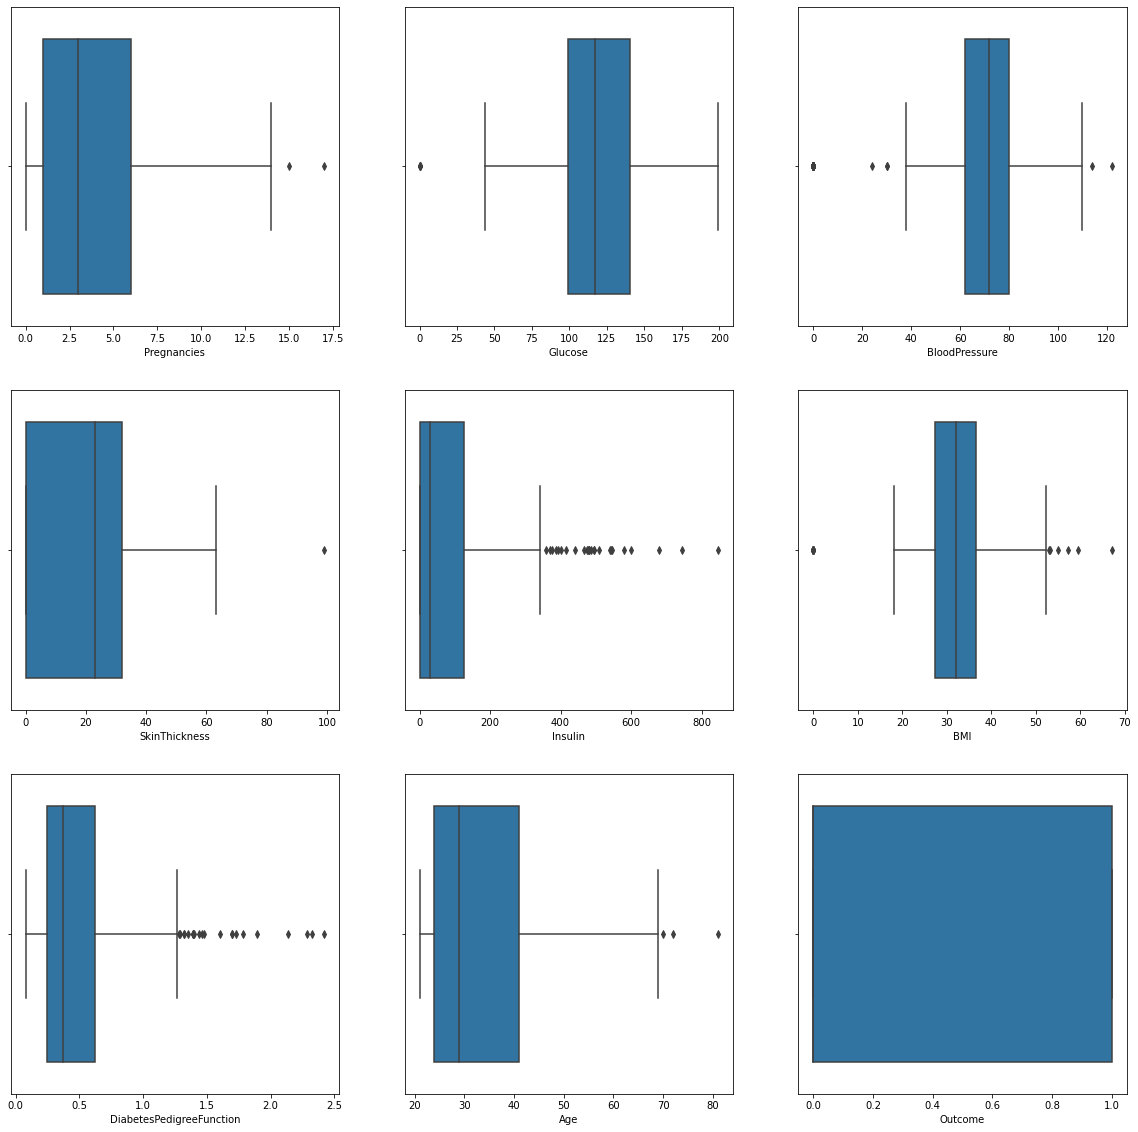

In [34]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.7)

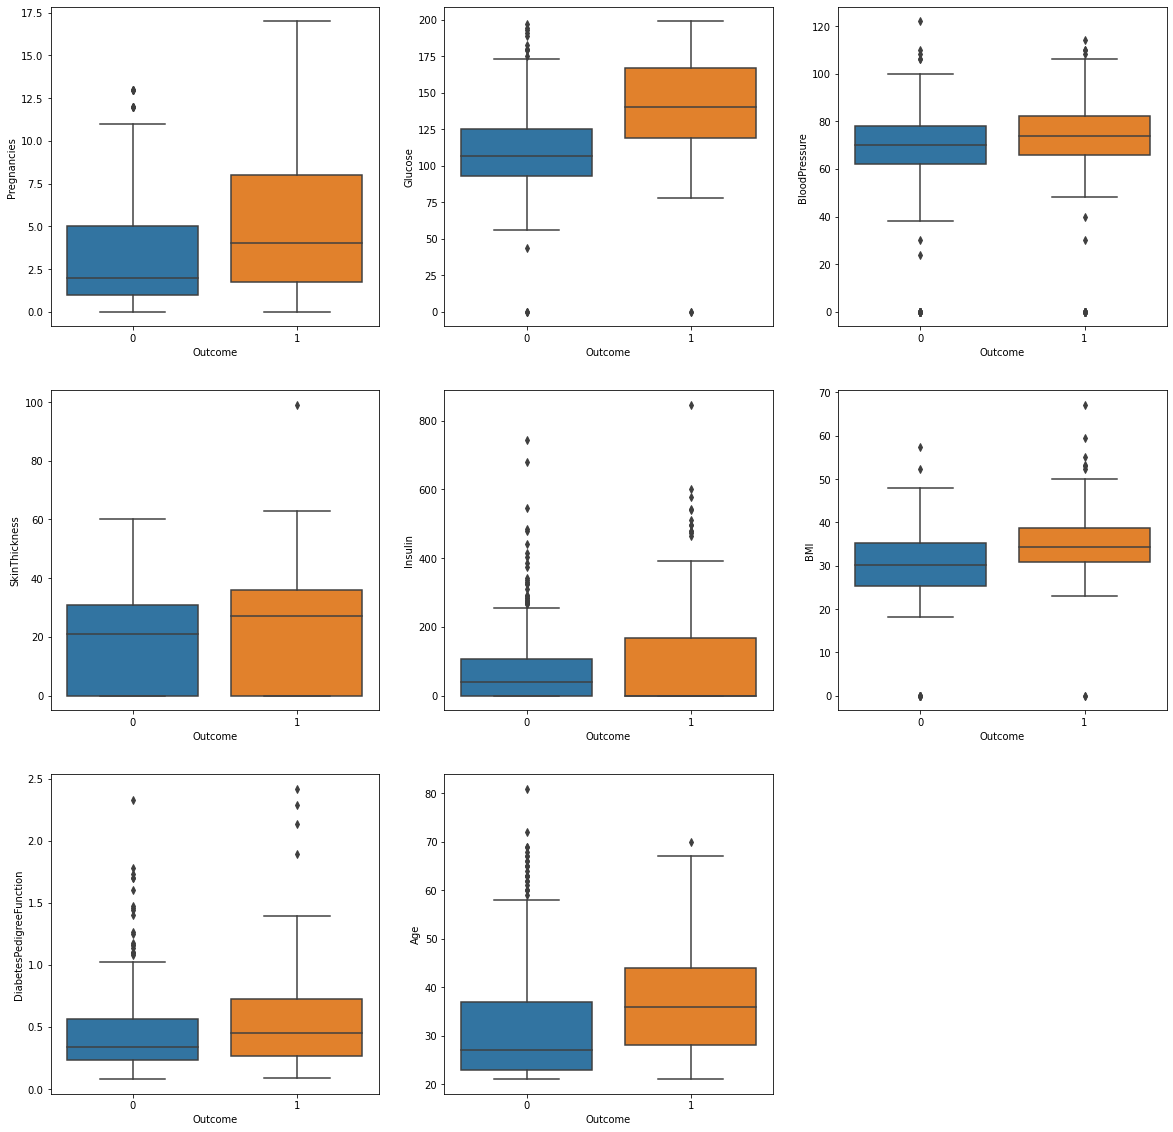

In [35]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

In [36]:
df.corr()["Outcome"].drop("Outcome").sort_values()

BloodPressure              0.065
SkinThickness              0.075
Insulin                    0.131
DiabetesPedigreeFunction   0.174
Pregnancies                0.222
Age                        0.238
BMI                        0.293
Glucose                    0.467
Name: Outcome, dtype: float64

<AxesSubplot:>

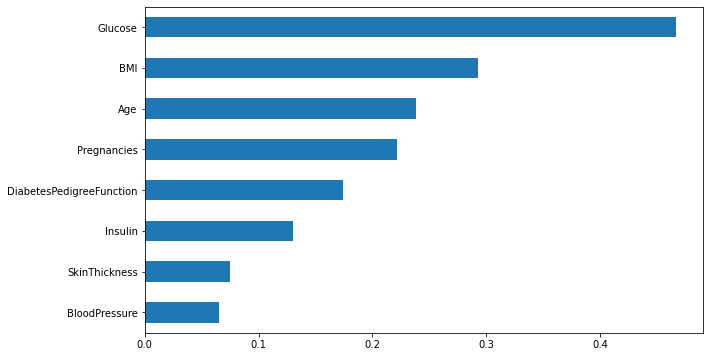

In [37]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

In [38]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.6*IQR)
        ust_sinir = Q3+(1.6*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [39]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(random_state=42))]
Pipeline(steps=operations)
log_model = Pipeline(steps=operations)
log_model.fit(X_train, y_train)
eval_metric(log_model, X_train, y_train, X_test, y_test)

# precision skor 0 değeri için : tahmin edilen 0 değerlerinden doğru bilme oranı,
# precision skor 1 için : tahmin edilen 1 değerlerinden doğru bilme oranı

# recall skor 0 değeri için : gerçek değeri 0 olanların doğru bilme oranı
# recall skor 1 değeri için : gerçek değeri 1 olanların doğru bilinme oranı

# f1 skor : precision ve recall skorun harmonik ortalamasıdır.

Test_Set
[[81 19]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Train_Set
[[359  41]
 [ 86 128]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       400
           1       0.76      0.60      0.67       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614



In [58]:
from sklearn.model_selection import cross_validate
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(random_state=42))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

scores = cross_validate(model, X_test, y_test, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.715
test_recall      0.463
test_f1          0.528
test_accuracy    0.722
dtype: float64

In [60]:
from sklearn.metrics import make_scorer

f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(random_state=42))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)
scores = cross_validate(model, X_test, y_test, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, 
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# 1 için tahmin ettiklerimizin 1 olarak bilinme başarısı: test_precision_1 
# tüm 1 değerlerinden başarılı 1 olarak bilme başarımız : test_recall_1

test_precision_1   0.715
test_recall_1      0.463
test_f1_1          0.528
dtype: float64

In [43]:
y_pred = log_model.predict(X_test)

In [44]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [45]:
log_model.predict_proba(X_test)[0:10]
# ilk sutun 0 olma olasılıkları, 2. sutun 1 olma olasılıklarıdır. p değeri 0.5 ten küçük olanlara 0 değeri atamış.

array([[0.38320664, 0.61679336],
       [0.89469066, 0.10530934],
       [0.72547391, 0.27452609],
       [0.69957488, 0.30042512],
       [0.9928453 , 0.0071547 ],
       [0.79701046, 0.20298954],
       [0.52888734, 0.47111266],
       [0.06521161, 0.93478839],
       [0.90347554, 0.09652446],
       [0.20526723, 0.79473277]])

In [55]:
np.array(y_test[0:10])

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [48]:
log_model.predict_proba(X_test)[0:10,0] # 0 olma olasılıklarını aldık.

array([0.38320664, 0.89469066, 0.72547391, 0.69957488, 0.9928453 ,
       0.79701046, 0.52888734, 0.06521161, 0.90347554, 0.20526723])

In [52]:
y_probs = log_model.predict_proba(X_test)
y_probs = y_probs[:,1] # 1 olasılık değerini almak için yaptık.
y_pred = [1 if i > 0.35 else 0 for i in y_probs]
# burda 0.35 ten büyükse 1 küçükse 0 ata dedik.

In [53]:
y_pred[0:10]

[1, 0, 0, 0, 0, 0, 1, 1, 0, 1]

In [54]:
np.array(y_test[0:10])

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred))
# daha düşük p değeri olan 0.35 ile tahminleme yaptığımız zaman daha güzel skorlar aldık ama recall yani 1 leri tahmin başarısı.

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.62      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154



In [61]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)

logistic__penalty = ["l1", "l2", "elasticnet"] 

logistic__C = np.logspace(-1, 5, 20) 

logistic__class_weight = ["balanced", None] 

logistic__solver = ["lbfgs", "liblinear", "sag", "saga"] 

recall_1 = make_scorer(recall_score, pos_label =1)

param_grid = {"logistic__penalty" : logistic__penalty,
              "logistic__C" : logistic__C,
              "logistic__class_weight":logistic__class_weight,
              "logistic__solver":logistic__solver}

grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = recall_1, # skor olarak recall al dedik. default olarak 1 olarak hesaplayacak. 
                          n_jobs = -1)


In [62]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             scoring=make_scorer(recall_score, pos_label=1))

In [63]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[72 28]
 [12 42]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.60      0.78      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154


Train_Set
[[306  94]
 [ 54 160]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       400
           1       0.63      0.75      0.68       214

    accuracy                           0.76       614
   macro avg       0.74      0.76      0.74       614
weighted avg       0.77      0.76      0.76       614



In [76]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [81]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

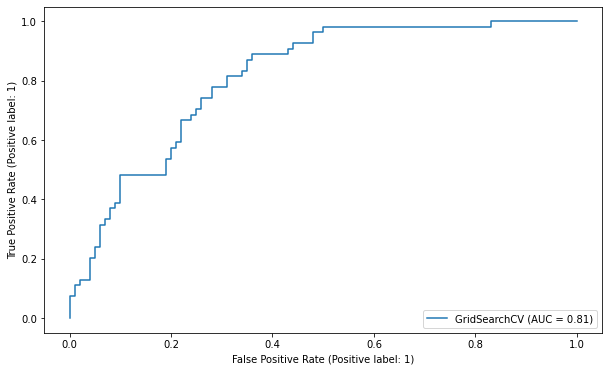

In [83]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

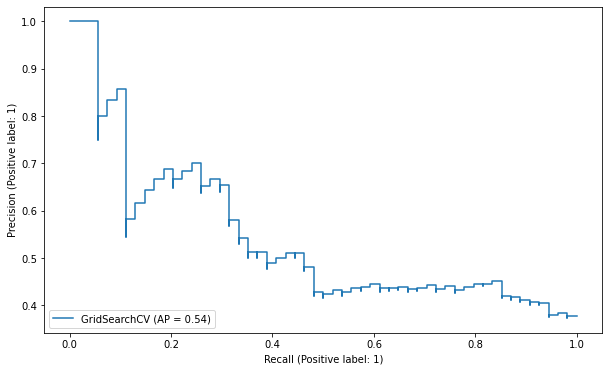

In [84]:
plot_precision_recall_curve(grid_model, X_test_scaler, y_test, pos_label=1);

In [79]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(random_state=42))]
Pipeline(steps=operations)
log_model = Pipeline(steps=operations)
log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=42))])

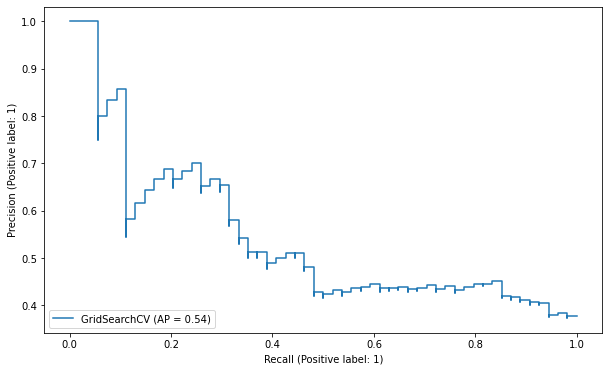

In [85]:
plot_precision_recall_curve(grid_model, X_test_scaler, y_test, pos_label=1);

In [88]:
y_pred_proba_tr = log_model.predict_proba(X_train_scaler)
roc_auc_score(y_train, y_pred_proba_tr[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba_tr[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold_scale = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold_scale

0.00010927602800810677

In [89]:
y_pred_proba_tr = log_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba_tr[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba_tr[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

0.35901902696672205

In [90]:
y_pred1 = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[60 40]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       100
           1       0.55      0.89      0.68        54

    accuracy                           0.70       154
   macro avg       0.73      0.74      0.70       154
weighted avg       0.78      0.70      0.71       154



In [91]:
y_train_pred1 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred1))
print(classification_report(y_train, y_train_pred1))

[[223 177]
 [ 22 192]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.69       400
           1       0.52      0.90      0.66       214

    accuracy                           0.68       614
   macro avg       0.72      0.73      0.68       614
weighted avg       0.77      0.68      0.68       614



In [111]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold_scale else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[  0 400]
 [  0 214]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.35      1.00      0.52       214

    accuracy                           0.35       614
   macro avg       0.17      0.50      0.26       614
weighted avg       0.12      0.35      0.18       614



In [110]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold_scale else 0)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[  0 100]
 [  0  54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.35      1.00      0.52        54

    accuracy                           0.35       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.12      0.35      0.18       154



In [98]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [99]:
CV(10, grid_model, pd.DataFrame(X_test), y_test, optimal_threshold)

Accuracy      58.25%  std 8.58%
Precision-1   45.71%  std 7.01%
Recall-1      94.00%  std 9.17%
F1_score-1    61.28%  std 7.45%


In [100]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [101]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(C=0.1, class_weight="balanced",penalty= "l1"
                                                                    , solver = 'liblinear'))]
pipe_final = Pipeline(operations)
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [103]:
prediction = pd.Series(pipe_final.predict_proba(X)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [104]:
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[282 218]
 [ 29 239]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       500
           1       0.52      0.89      0.66       268

    accuracy                           0.68       768
   macro avg       0.71      0.73      0.68       768
weighted avg       0.77      0.68      0.68       768



In [108]:
CV(10, pipe_final, pd.DataFrame(X), y, optimal_threshold_scale)

Accuracy      34.89%  std 0.34%
Precision-1   34.89%  std 0.34%
Recall-1     100.00%  std 0.00%
F1_score-1    51.73%  std 0.38%


In [109]:
CV(10, pipe_final, pd.DataFrame(X), y, optimal_threshold)

Accuracy      67.44%  std 4.57%
Precision-1   52.33%  std 4.19%
Recall-1      89.20%  std 5.40%
F1_score-1    65.77%  std 3.21%
